### opencv 영상을 처리하고 싶다면
<img src="https://opencv.org/wp-content/uploads/2022/05/logo.png" width="50px">

실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리이다. 원래는 인텔이 개발하였다. 실시간 이미지 프로세싱에 중점을 둔 라이브러리이다. 인텔 CPU에서 사용되는 경우 속도의 향상을 볼 수 있는 IPP(Intel Performance Primitives)를 지원한다. 이 라이브러리는 윈도우, 리눅스 등에서 사용 가능한 크로스 플랫폼이며 오픈소스 BSD 허가서 하에서 무료로 사용할 수 있다. OpenCV는 TensorFlow, Torch / PyTorch 및 Caffe의 딥러닝 프레임워크를 지원한다.

In [ ]:
#설치가 조금 까다로울 수 있음
%pip install opencv-python

In [ ]:
#import에서 opencv가 아닌 cv2로 명명되어 있음. 가끔. cv로 약어를 만드는 소스도 있음
import cv2 

In [ ]:
# 이미지를 다운로드 해야합니다. 
# lenna png로 검색합시다.
# https://lenna.org 에서 lenna에 대한 설명을 볼 수 있습니다. 

In [ ]:
#이미지 읽기
img = cv2.imread("lenna.png") #윈도우에서는 대소문자 구별을 안한다.
cv2.imwrite("lenna_copy.png",img)

In [ ]:
#랜덤을 이용하여 이미지를 생성해 봅시다. 
import numpy as np
raw_bytes = np.random.randint(0,255, (400*300*3),dtype=np.uint8)
img = raw_bytes.reshape(400,300,3) #가로 세로 비율을 생각합시다...
cv2.imwrite("random.png",img)


In [ ]:
#이미지를 출력해 봅시다. 
cv2.imshow("test", img) #타이틀과 이미지 데이터로 이루어짐
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img[:100,:100] = (255,0,0) #r???
img[100:200,100:200] = (0,255,0) #g???
img[200:300,200:300] = (0,0,255) #b???
cv2.imshow("test", img) #타이틀과 이미지 데이터로 이루어짐
cv2.waitKey()
cv2.destroyAllWindows() #bgr의 형태로 나온다.



In [ ]:
#색공간 변환
img = cv2.imread("Lenna.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imshow("origin", img)
cv2.imshow("gray", img_gray)
cv2.imshow("RGB", img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
#트랙바 이용
img = cv2.imread("Lenna.png")

cv2.namedWindow("TWindow")
cv2.createTrackbar("trackValue", "TWindow", 0, 255*3, lambda x:x)
cv2.createTrackbar("trackValue2", "TWindow", 0, 255*3, lambda x:x)


key = cv2.waitKey()
value = cv2.getTrackbarPos("trackValue" ,"TWindow")
value2 = cv2.getTrackbarPos("trackValue2" ,"TWindow")
print(value, value2)

cv2.destroyAllWindows()

In [ ]:
# 크기조절!!!
img = cv2.imread("Lenna.png")
img_resize= cv2.resize(img, dsize=(200,200), interpolation=cv2.INTER_LINEAR)
img_resize2= cv2.resize(img, dsize=(0,0), fx=.3, fy=.7,  interpolation=cv2.INTER_LINEAR)
img_resize3= cv2.resize(img, dsize=(1024,1024), interpolation=cv2.INTER_CUBIC)

cv2.imshow("origin", img)
cv2.imshow("resize", img_resize)
cv2.imshow("resize2", img_resize2)
cv2.imshow("resize2", img_resize3)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
#크기 조절과 트랙바 조합
img = cv2.imread("Lenna.png")

cv2.namedWindow("TWindow")
cv2.createTrackbar("trackValue", "TWindow", 0, 255*3, lambda x:x)
cv2.createTrackbar("trackValue2", "TWindow", 0, 255*3, lambda x:x)


while True:
    value = cv2.getTrackbarPos("trackValue" ,"TWindow")
    value2 = cv2.getTrackbarPos("trackValue2" ,"TWindow")
    resize = cv2.resize(img, (value+1,value2+1),interpolation=cv2.INTER_LINEAR)
    cv2.imshow("origin",img)
    cv2.imshow("resize",resize)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
cv2.destroyAllWindows()

In [ ]:
#외각선 검출
img = cv2.imread("Lenna.png")

cv2.namedWindow("TWindow")
cv2.createTrackbar("trackValue", "TWindow", 0, 255*3, lambda x:x)
cv2.createTrackbar("trackValue2", "TWindow", 0, 255*3, lambda x:x)


while True:
    value = cv2.getTrackbarPos("trackValue" ,"TWindow")
    value2 = cv2.getTrackbarPos("trackValue2" ,"TWindow")
    resize = cv2.resize(img, (value+1,value2+1),interpolation=cv2.INTER_LINEAR)
    img_canny = cv2.Canny(img, value,value2)
    cv2.imshow('edge',img_canny)
    cv2.imshow("origin",img)
    cv2.imshow("resize",resize)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
cv2.destroyAllWindows()


In [ ]:
#캠을 이용한 캡쳐
cam = cv2.VideoCapture(0)
size = (cam.get(cv2.CAP_PROP_FRAME_HEIGHT),
        cam.get(cv2.CAP_PROP_FRAME_WIDTH))
print(size)
success, frame = cam.read()
cv2.imshow("cam",frame)
cv2.waitKey()
cam.release()
cv2.destroyAllWindows()


In [ ]:
#캠 사이즈 조절
cam = cv2.VideoCapture(0)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT,1080)
cam.set(cv2.CAP_PROP_FRAME_WIDTH,1920)
print(size)
success, frame = cam.read()
cv2.imshow("cam",frame)
cv2.waitKey()
cam.release()
cv2.destroyAllWindows()


In [ ]:
#키보드 입력 구조
cam = cv2.VideoCapture(0)
idx_r, idx_l = 0, 0
while True:
    success, frame = cam.read()
    if success!=True:
        print("cam read error!")
        break
    cv2.imshow("cam",frame)
    key = cv2.waitKey(1)
    if key == ord("1"):
        break
    elif key == ord("2"):
        cv2.imwrite(f"capture/left_{idx_l}.png", frame)
        idx_l +=1
    elif key == ord("3"):
        cv2.imwrite(f"capture/right_{idx_r}.png", frame)
        idx_r +=1
cam.release()
cv2.destroyAllWindows()


In [ ]:
#이진화
img = cv2.imread("Lenna.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#이미지와, 임계값, 임계값 이상일 때의 값, 임계값 타입을 넣을 수 있다.
ret, dst = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(img_gray, (5,5),0)
ret, otsu = cv2.threshold(blur, 0,255, cv2.THRESH_OTSU)
canny  = cv2.Canny(otsu,200,360)
cv2.imshow("dst", dst)
cv2.imshow("otsu", otsu)
cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
## 간단한 도형 그리기
img = cv2.imread("Lenna.png")
cv2.line(img, (0,0),(300,300),(0,0,255),2)
cv2.circle(img,(150,150),10,(255,0,0),-1)
cv2.rectangle(img, (150,150),(200,200),(0,255,0),-1)
cv2.putText(img, "test ", (20,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),5)
cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#contour
img = cv2.imread("abc.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#이미지와, 임계값, 임계값 이상일 때의 값, 임계값 타입을 넣을 수 있다.
ret, dst = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
ret, otsu = cv2.threshold(blur, 0,255, cv2.THRESH_OTSU)
canny  = cv2.Canny(otsu,200,360)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for area in contours:
    cv2.drawContours(img, [area], 0, (255, 0, 0), 5)  # blue

cv2.imshow("otsu", img)
cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
#캠을 사용한 테스트

import cv2

cv2.namedWindow("TWindow")
cv2.createTrackbar("value1", "TWindow", 0,255,lambda x:x)
cv2.createTrackbar("value2", "TWindow", 0,255,lambda x:x)
cam = cv2.VideoCapture(0)
while True:
    state, img = cam.read()
    key = cv2.waitKey(1)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.blur(img_gray, (3,3),0)
    # ret, img_gray = cv2.threshold(img_gray, 0,255, cv2.THRESH_OTSU)
    value1 = cv2.getTrackbarPos("value1", "TWindow")
    value2 = cv2.getTrackbarPos("value2", "TWindow")
    print(value1, value2)
    img_gray = cv2.Canny(img_gray, value1, value2)
    cv2.imshow("image", img_gray)
    if key == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()

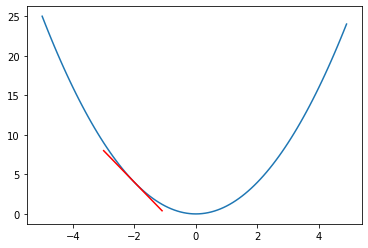

In [138]:
import matplotlib.pyplot as plt

x = np.arange(-5,5,.1)
y = x**2
xx1 = -2
yy1 = xx1**2
xx2 = xx1+1.e-5
yy2 = xx2**2
w = (yy1-yy2)/(xx1-xx2)
b=yy1-w*xx1

tempx = np.arange(xx1-1,xx1+1,0.1)
plt.plot(x,y,tempx,w*tempx+b, "r")

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # Prevent an overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
